In [3]:
import pandas as pd
import numpy as np
import matplotlib
#指定默认字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family']='sans-serif'
import matplotlib.pyplot as plt

In [4]:
train_op=pd.read_csv(r"D:\DA_competition\DC\data\operation_train.csv")
train_tag=pd.read_csv(r"D:\DA_competition\DC\data\tag_train.csv")
#表连接
train_op=pd.merge(train_op,train_tag,on="UID",how="left")
print(len(train_op))
train_op=train_op.drop_duplicates()
print(len(train_op))

1460843
1234347


In [6]:
#查看基本信息
#查看空值数量、分别属于0、1的空值数量
#操作表
train_op_info=pd.DataFrame()
train_op_info["样本数"]=train_op.apply(lambda x:len(x),axis=0)
train_op_info["空值数"]=train_op.apply(lambda x:len(x[x.isnull()]),axis=0)
train_op_info["空值占比"]=train_op_info["空值数"]/len(train_op)

train_op_info["0的个数"]=train_op[train_op["Tag"]==0].apply(lambda x:len(x),axis=0)
train_op_info["0的空值数"]=train_op[train_op["Tag"]==0].apply(lambda x:len(x[x.isnull()]),axis=0)
train_op_info["0空值占比"]=train_op_info["0的空值数"]/len(train_op[train_op["Tag"]==0])

train_op_info["1的个数"]=train_op[train_op["Tag"]==1].apply(lambda x:len(x),axis=0)
train_op_info["1的空值数"]=train_op[train_op["Tag"]==1].apply(lambda x:len(x[x.isnull()]),axis=0)
train_op_info["1空值占比"]=train_op_info["1的空值数"]/len(train_op[train_op["Tag"]==1])

train_op_info["属性值类别数"]=train_op.apply(lambda x:len(x.value_counts()),axis=0)
train_op_info["0的属性值类别数"]=train_op[train_op["Tag"]==0].apply(lambda x:len(x.value_counts()),axis=0)
train_op_info["1的属性值类别数"]=train_op[train_op["Tag"]==1].apply(lambda x:len(x.value_counts()),axis=0)


In [7]:
train_op_info

,样本数,空值数,空值占比,0的个数,0的空值数,0空值占比,1的个数,1的空值数,1空值占比,属性值类别数,0的属性值类别数,1的属性值类别数
UID,1234347,0,0.000000,1096976,0,0.000000,137371,0,0.000000,29728,25451,4277
day,1234347,0,0.000000,1096976,0,0.000000,137371,0,0.000000,30,30,30
mode,1234347,0,0.000000,1096976,0,0.000000,137371,0,0.000000,89,87,60
success,1234347,90721,0.073497,1096976,68229,0.062197,137371,22492,0.163732,2,2,2
time,1234347,0,0.000000,1096976,0,0.000000,137371,0,0.000000,80670,79878,53047
os,1234347,0,0.000000,1096976,0,0.000000,137371,0,0.000000,7,6,7
version,1234347,235733,0.190978,1096976,205718,0.187532,137371,30015,0.218496,38,36,15
device1,1234347,235071,0.190442,1096976,205086,0.186956,137371,29985,0.218278,2421,2209,305
device2,1234347,409746,0.331954,1096976,341884,0.311660,137371,67862,0.494005,1652,1478,707
device_code1,1234347,357496,0.289624,1096976,301839,0.275156,137371,55657,0.405158,26184,23974,2308


In [8]:
def discrete_field(name):
    data=train_op[["UID",name,"Tag"]].drop_duplicates().fillna(0)
    data[name]=data[name].apply(lambda x:str(x))
    data[data.Tag==0][name].value_counts().sort_index().plot(kind='bar',title="普通用户"+name+"属性值-用户数量分布图",grid=True)
    plt.show()
    data[data.Tag==1][name].value_counts().sort_index().plot(kind='bar',title="羊毛党"+name+"属性值-用户数量分布图",grid=True)
    plt.show()
    data[data.Tag==0].groupby("UID")[name].unique().apply(lambda x:len(x)).value_counts().sort_index().plot(kind='bar',title="普通用户对应"+name+"属性种类数-用户数量分布图",grid=True)
    plt.show()
    data[data.Tag==1].groupby("UID")[name].unique().apply(lambda x:len(x)).value_counts().sort_index().plot(kind='bar',title="羊毛党对应"+name+"属性种类数-用户数量分布图",grid=True)
    plt.show()

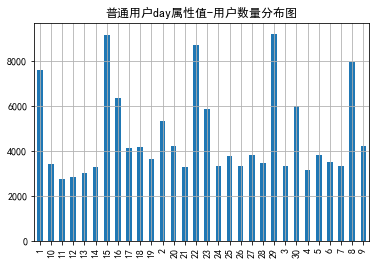

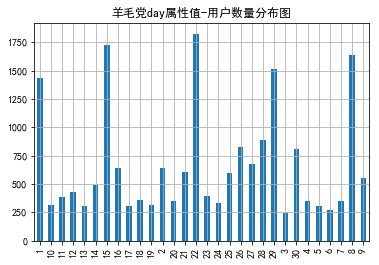

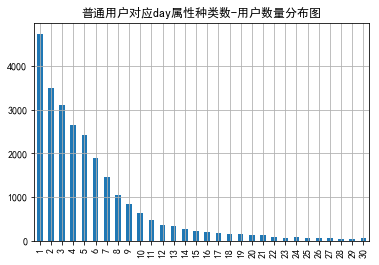

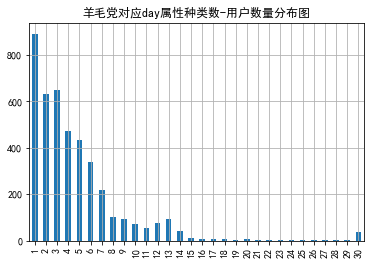

In [9]:
discrete_field("day")

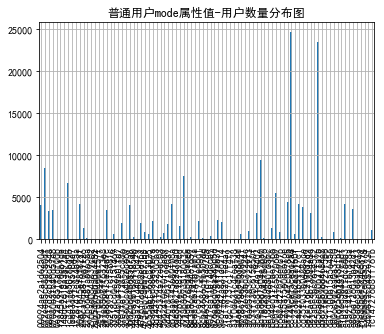

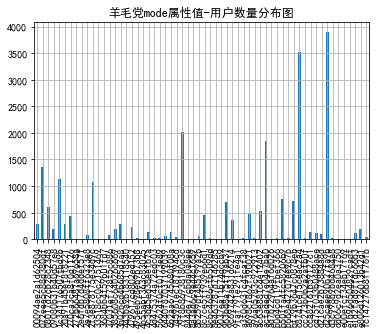

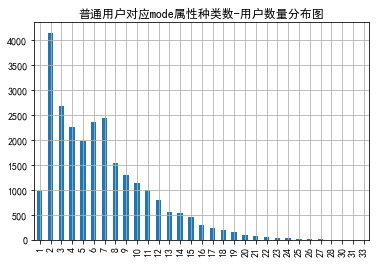

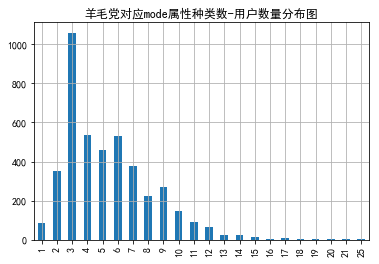

In [10]:
discrete_field("mode")

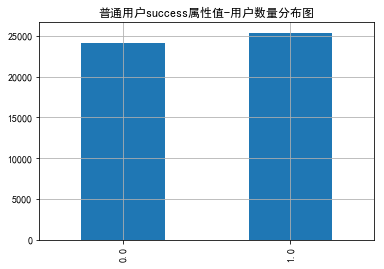

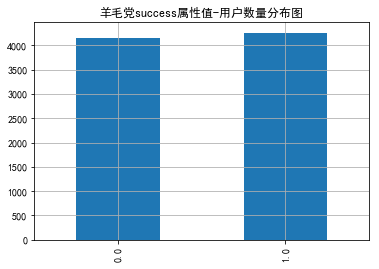

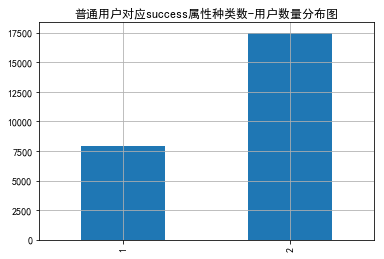

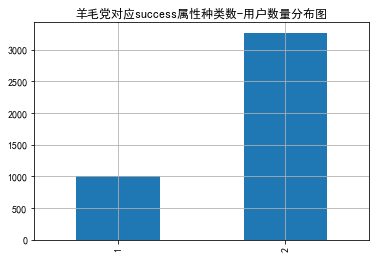

In [11]:
discrete_field("success")

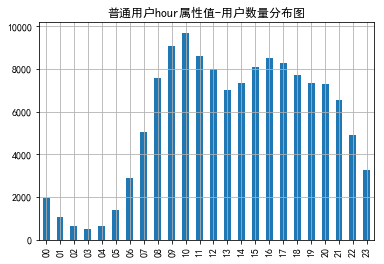

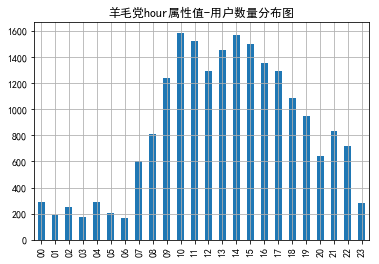

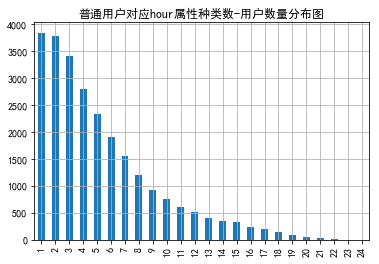

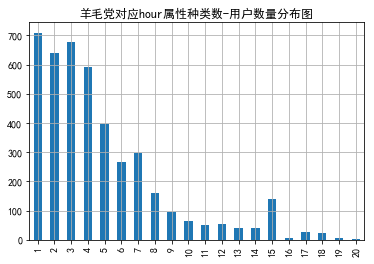

In [12]:
train_op["hour"]=train_op.time.apply(lambda x:x.split(":")[0])
discrete_field("hour")

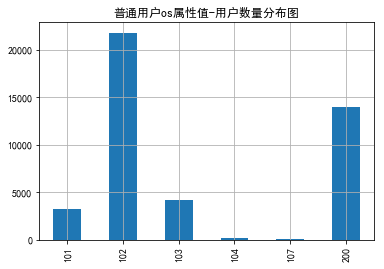

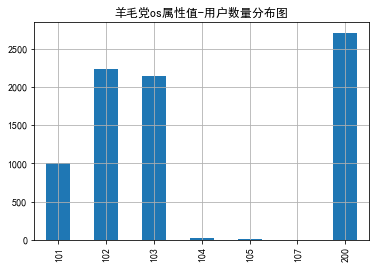

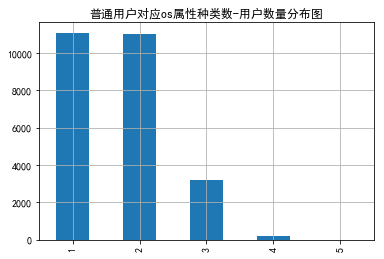

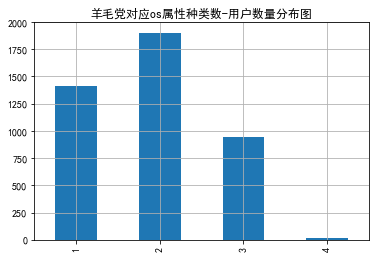

In [13]:
discrete_field("os")

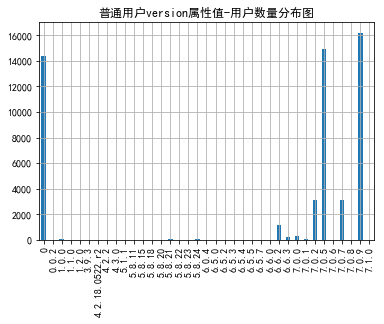

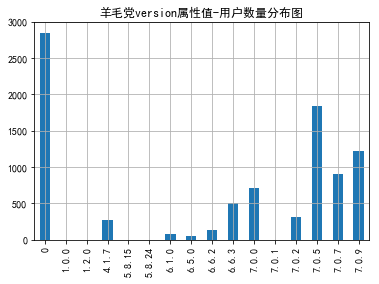

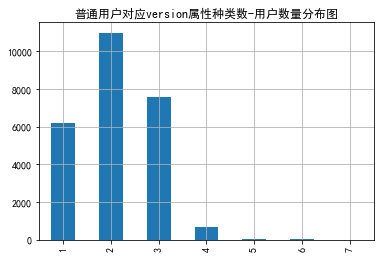

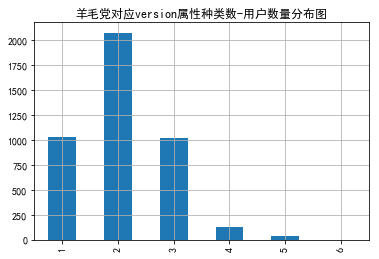

In [14]:
discrete_field("version")

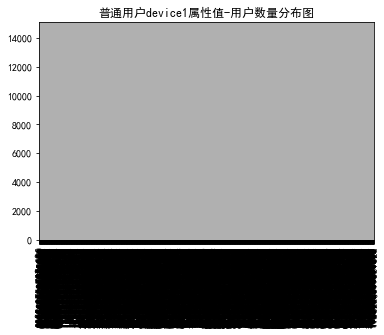

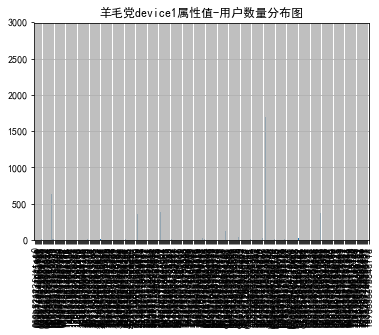

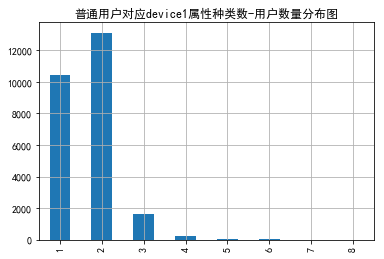

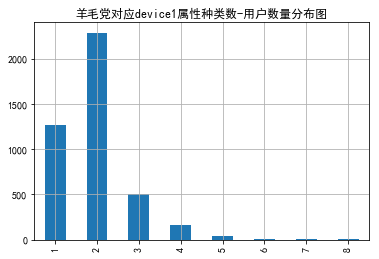

In [15]:
discrete_field("device1")

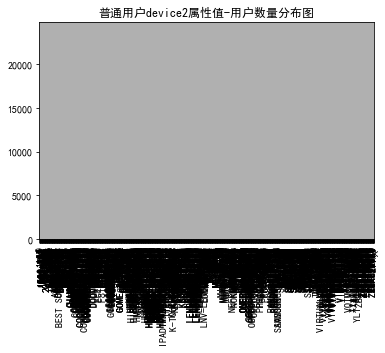

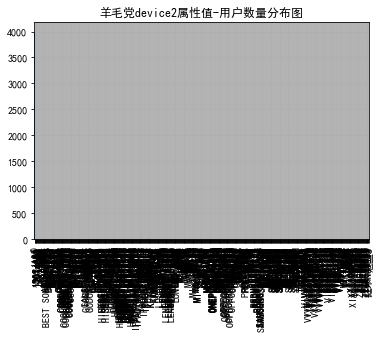

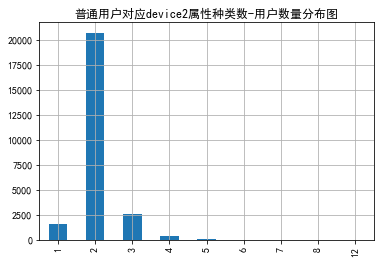

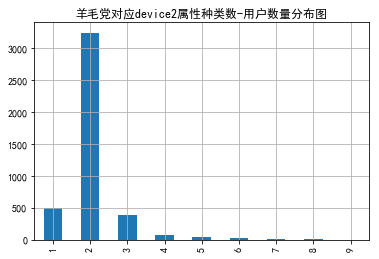

In [16]:
discrete_field("device2")

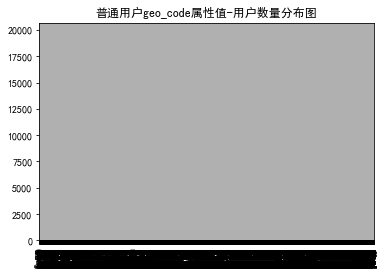

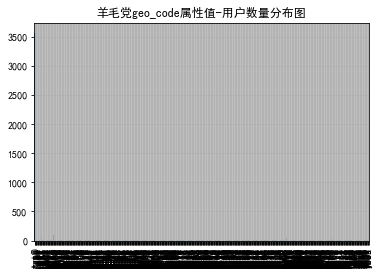

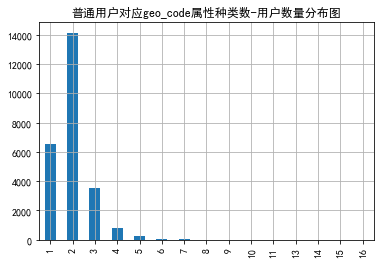

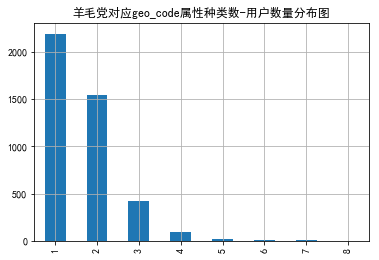

In [17]:
discrete_field("geo_code")

In [20]:
def one_one(name):
    data=train_op[["UID",name,"Tag"]].drop_duplicates()
    data[data.Tag==0].groupby("UID")[name].unique().apply(lambda x:len(x)).value_counts().sort_index().plot(kind='bar',title="普通用户对应"+name+"属性种类数-用户数量分布图",grid=True)
    plt.show()
    data[data.Tag==1].groupby("UID")[name].unique().apply(lambda x:len(x)).value_counts().sort_index().plot(kind='bar',title="羊毛党对应"+name+"属性种类数-用户数量分布图",grid=True)
    plt.show()
    ratio=pd.DataFrame(data[name].value_counts())
    ratio=ratio.merge(pd.DataFrame(data.groupby(name).Tag.apply(lambda x:len(x[x==1])/len(x))),how="left",left_index=True,right_index=True)
    ratio.columns=["用户数量","羊毛党用户占比"]
    ratio.groupby("用户数量")["羊毛党用户占比"].mean().plot(title=name+"用户数量和羊毛党占比统计图",grid=True,kind='bar')
#     plt.plot(ratio.iloc[:,0],ratio.iloc[:,1])
#     plt.title(name+"用户数量和羊毛党占比统计图")
    plt.show()
    print(ratio)

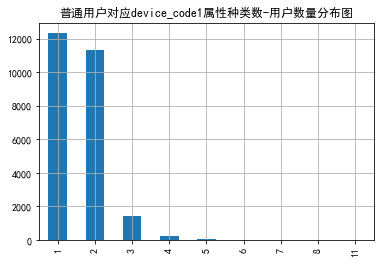

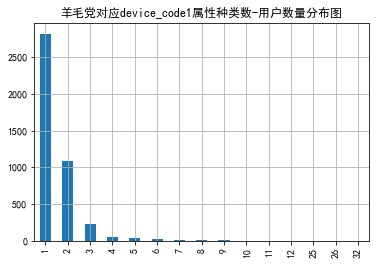

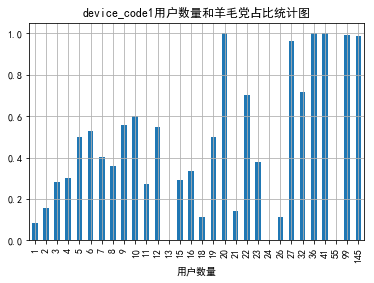

                  用户数量   羊毛党用户占比
c50faf7eba139d67   145  0.986207
144d7a1dfba19310    99  0.989899
68cab16ebab00a7f    55  0.000000
1d81e6d820817708    41  1.000000
4ab1bf372599bb0a    36  1.000000
5c69ea4ca88d1e57    32  0.437500
a6bc78acec7a5f0e    32  1.000000
93caa650ffd48422    27  0.962963
b9bf8250b5f8a819    26  0.115385
503404927b455a33    24  0.000000
c9564c0bc84a9226    23  0.956522
4a5ca1ae90a750da    23  0.130435
75414d9ee615a86f    23  0.043478
f2f69ff99415c3e2    22  1.000000
1104a97782d1c405    22  0.409091
8e9e7619dfbcc00f    21  0.142857
d6cd86edf96c7895    20  1.000000
68314f492b4cda44    19  1.000000
333712c4ced1c5eb    19  0.000000
0fa5a104b3ecb0e5    18  0.111111
a271a6b89bb30657    16  0.000000
2462c24295264727    16  0.937500
d4123af94686610a    16  0.062500
efb07ff5e66bbfd7    15  0.066667
8e10dd8c89e2c5b2    15  0.400000
8e91226776129f3a    15  1.000000
df1940ed031605b6    15  0.000000
6ece2ebc397af8eb    15  0.000000
6c078eb5567abe41    13  0.000000
8687c00c3b

In [21]:
one_one("device_code1")

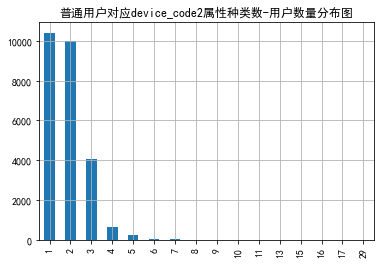

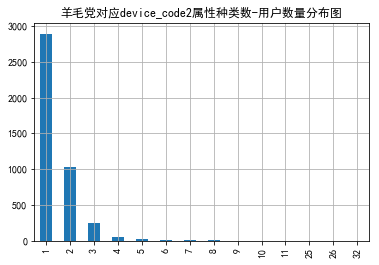

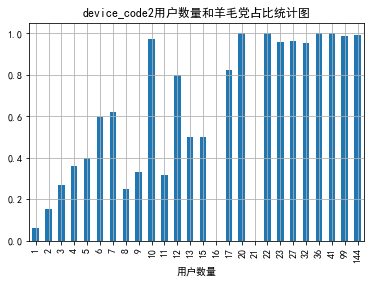

                  用户数量   羊毛党用户占比
483ddc3a31666b8f   144  0.993056
59dcb10df09acd30    99  0.989899
442e7c4eb41ca12c    41  1.000000
892c0cdc1e15901e    36  1.000000
cbef0d7db55d5cd8    32  1.000000
4f5108bdf3f9bcd9    32  0.906250
86ba5cff4f76031e    27  0.962963
035944a3a203eca4    23  0.956522
1ba33c665e062327    22  1.000000
81060427961fcc4a    21  0.000000
0d01639b204b7c11    20  1.000000
a2e61e4d6d7b049b    17  0.823529
5b5ee23f1845b2e1    16  0.000000
7fa7f6998ec26c3c    15  0.000000
6e839aca4c1beaf9    15  0.000000
5f995a5750d47ea0    15  1.000000
a6ac0a59e4ec1b8e    15  1.000000
63c472b149a64e32    13  1.000000
6e48c2a9c38c2e80    13  0.000000
3c5b5ba338fd8f12    13  0.000000
5c608641915a5f76    13  1.000000
b18216844db5d657    12  1.000000
874bb657e133d3be    12  1.000000
7e0ac53952e39c4e    12  1.000000
cb0c93b00b3f1f22    12  0.000000
df3d77cc3cdd9551    12  1.000000
77dc7feba84dba0d    11  0.000000
92733fc5a610e990    11  1.000000
872f46390d7069be    11  0.000000
0fa5a104b3

In [22]:
one_one("device_code2")

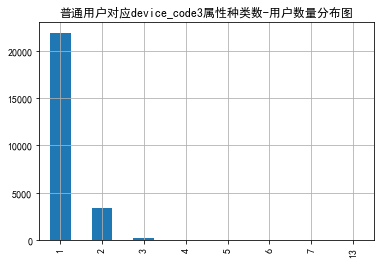

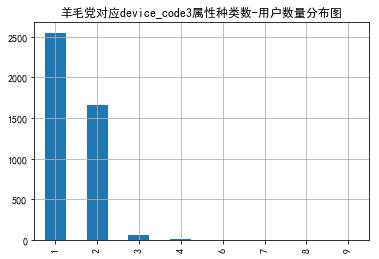

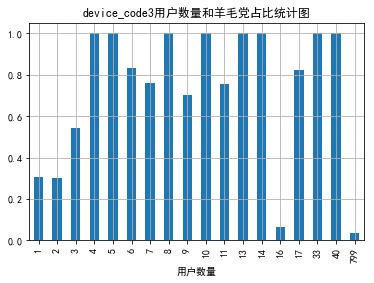

                  用户数量   羊毛党用户占比
14c09cc8ce23d46c   799  0.035044
0d1884730db15ddc    40  1.000000
a127a0905331fdf9    33  1.000000
7a141ea8588d2d60    17  0.647059
819a5173912a1236    17  1.000000
9aecd507ce2b80ac    16  0.062500
6d746d4508d73369    14  1.000000
276e33faeaed9066    13  1.000000
d0e8c6b12bfd5e35    11  0.272727
52713999e62e60ec    11  1.000000
2d89ba631a77cbd7    11  1.000000
c100f11a26c11d55    10  1.000000
f753b9d374091435    10  1.000000
481e43c7d5375ed4     9  0.111111
60ef7f0dfa0ffe49     9  1.000000
5ea9cac0a121ffc3     9  1.000000
3b66d485f94a7e4f     8  1.000000
31417f4b8dc449f6     8  1.000000
944d68bda60a345f     8  1.000000
778b2eebbefb5dbd     8  1.000000
13b61bfdf44feffd     7  1.000000
ebe882de7003ef64     7  0.285714
29a010ff729c7241     7  1.000000
4c7c6c140839b324     6  1.000000
21d14216ea9fc5b9     6  1.000000
1076ecb6614b1695     6  1.000000
8278f0142f04ebe6     6  0.166667
a2d191c6e2ce9afe     6  1.000000
245305c4a32542f4     6  0.833333
7ea6967e56

In [23]:
one_one("device_code3")

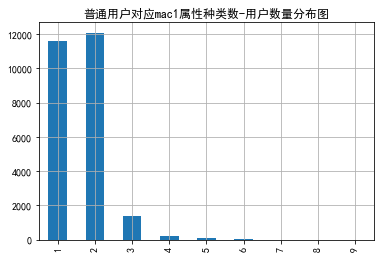

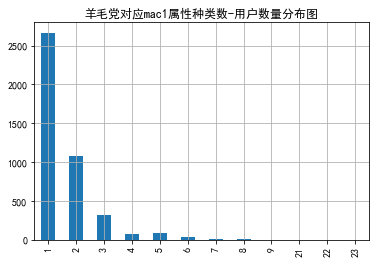

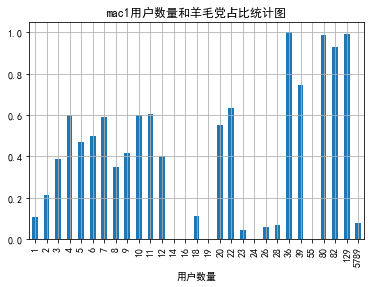

                  用户数量   羊毛党用户占比
a8dc52f65085212e  5789  0.077906
b910ea1cd2e10a1d   129  0.992248
f3ee3ff10c23b820    82  0.926829
25ad3858d08d4757    80  0.987500
eae886a2b4f94b94    55  0.000000
291f3d4d6a0c0cc1    39  0.743590
573ee3dc510461f6    39  0.743590
9f37a0e0ba9f639b    36  1.000000
3d3d4263a9054ebb    28  0.071429
97feab6f8153cd84    26  0.000000
48d6ef8000341c5d    26  0.115385
e1e19ab6cce9ee3e    24  0.000000
3b7fef223f0b0025    23  0.043478
de7aad82937c2164    22  0.409091
f235c07461ba106d    22  0.136364
2c1d9e392db14e89    22  1.000000
d9c956462582af29    22  1.000000
23cbf44f9368e43c    20  1.000000
5a0ba922d8c85b2b    20  0.100000
635aba1d53ec6ba4    19  0.000000
566150f86dc15a28    18  0.111111
781972737f3ca3e5    16  0.000000
377f51d92afc294b    14  0.000000
e666a605ffc1171b    12  0.083333
b1f92d4324c1ee16    12  0.083333
a854a451649eea21    12  1.000000
04f292f7f4f179b6    12  0.000000
a57eb5609a4ab978    12  1.000000
898141a50e8dfad4    12  0.250000
7a1488cff8

In [24]:
one_one("mac1")

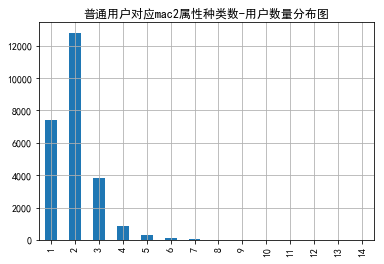

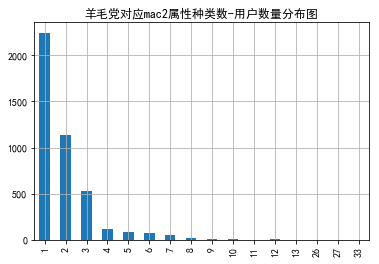

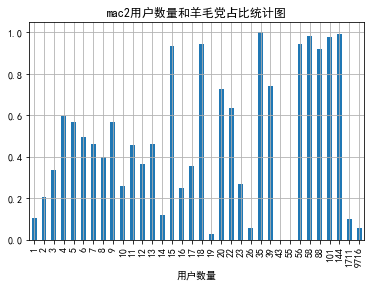

                  用户数量   羊毛党用户占比
a8dc52f65085212e  9716  0.057534
3b34a667e4d2e60e  1711  0.098188
b910ea1cd2e10a1d   144  0.993056
25ad3858d08d4757   101  0.980198
f3ee3ff10c23b820    88  0.920455
656ccbeb6d97be58    58  0.982759
21110ed2f6992470    56  0.946429
5c958017593bb77b    55  0.000000
468299cd65e117a9    43  0.000000
573ee3dc510461f6    39  0.743590
6c8e9e55865cf666    39  0.743590
7b89d8ef44a8e152    35  1.000000
cdb2a87cf541aa01    26  0.000000
742db78155879c6d    26  0.115385
1e49ee277a1be75f    23  0.217391
e751a8d70b4cc011    23  0.043478
2c1d9e392db14e89    23  0.956522
ce1ce739e81ac904    23  0.086957
4e76bd4cec2df63b    23  0.043478
728738c3dca68267    22  1.000000
6925198bc56db9ef    22  1.000000
3988cd258c8771d2    22  0.136364
237dfeebe6b2913d    22  0.409091
03988af98490b233    20  1.000000
c0d9119094e51024    20  0.450000
eba7c3d0aeabe08f    19  0.052632
2fd0bc0808da52b4    19  0.000000
9b59f55129b36f51    18  0.944444
d40f2bb7426ab695    17  0.352941
166602c23b

In [25]:
one_one("mac2")

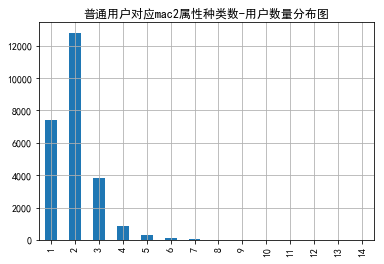

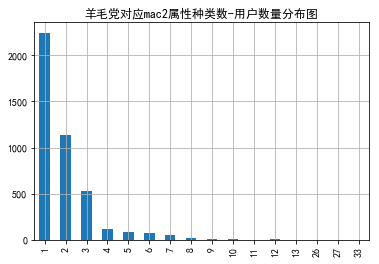

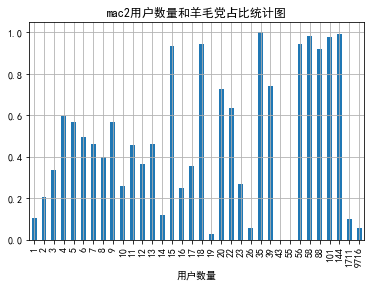

                  用户数量   羊毛党用户占比
a8dc52f65085212e  9716  0.057534
3b34a667e4d2e60e  1711  0.098188
b910ea1cd2e10a1d   144  0.993056
25ad3858d08d4757   101  0.980198
f3ee3ff10c23b820    88  0.920455
656ccbeb6d97be58    58  0.982759
21110ed2f6992470    56  0.946429
5c958017593bb77b    55  0.000000
468299cd65e117a9    43  0.000000
573ee3dc510461f6    39  0.743590
6c8e9e55865cf666    39  0.743590
7b89d8ef44a8e152    35  1.000000
cdb2a87cf541aa01    26  0.000000
742db78155879c6d    26  0.115385
1e49ee277a1be75f    23  0.217391
e751a8d70b4cc011    23  0.043478
2c1d9e392db14e89    23  0.956522
ce1ce739e81ac904    23  0.086957
4e76bd4cec2df63b    23  0.043478
728738c3dca68267    22  1.000000
6925198bc56db9ef    22  1.000000
3988cd258c8771d2    22  0.136364
237dfeebe6b2913d    22  0.409091
03988af98490b233    20  1.000000
c0d9119094e51024    20  0.450000
eba7c3d0aeabe08f    19  0.052632
2fd0bc0808da52b4    19  0.000000
9b59f55129b36f51    18  0.944444
d40f2bb7426ab695    17  0.352941
166602c23b

In [26]:
one_one("mac2")

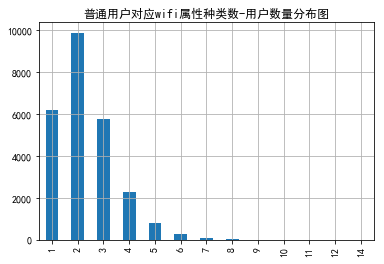

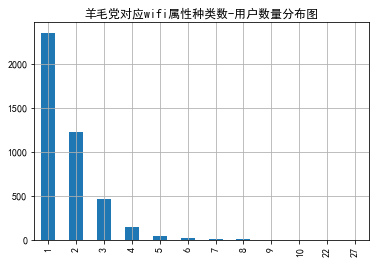

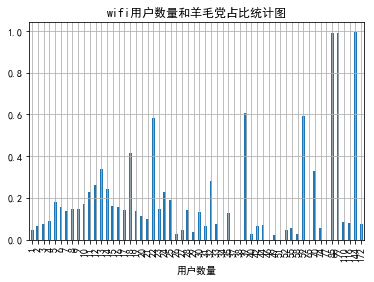

                  用户数量   羊毛党用户占比
a3fd93fe06a59074   172  0.075581
6ec718bbccbaedd2   144  0.993056
2b170a64f5473601   116  0.077586
6945a7487de9d1cd   110  0.081818
2109917457c421d3    99  0.989899
bedb236bb4bcccba    85  0.988235
89efed0cc9374acf    77  0.000000
3d8a206e19c98381    74  0.054054
d2eb6cf107ce2484    70  0.328571
af1c336e05b3df4e    65  0.000000
37ad8b859cb7e6b2    59  0.593220
f63482ebf156e448    58  0.034483
06d60ef7b8ab1f19    58  0.017241
c863adcc1634456a    55  0.109091
f4632e129659c3f1    55  0.000000
0201faa26cdf62a2    52  0.096154
2bd6620b2ea0f049    52  0.000000
0b033ffba1bbae0c    51  0.000000
84a12b07964b9892    49  0.020408
8e8b465407625ae2    46  0.000000
fba86dc8a8768767    44  0.068182
f250971823029422    42  0.023810
6d6d7355afb477db    42  0.142857
d3123068639a15f4    42  0.023810
7f698c76fc8a1b95    40  0.025000
06ccf33644a0cc1d    39  0.743590
8acea68e9148f638    39  0.076923
cfa3c4be94758eaf    39  1.000000
9a1822d0ef7b573c    38  0.000000
253c450edf

In [27]:
one_one("wifi")

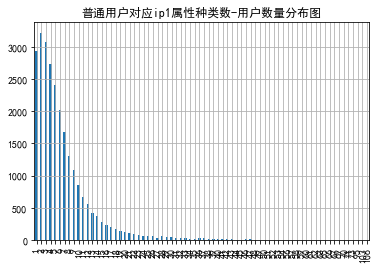

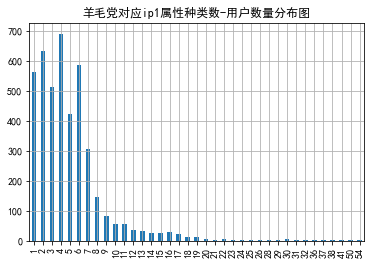

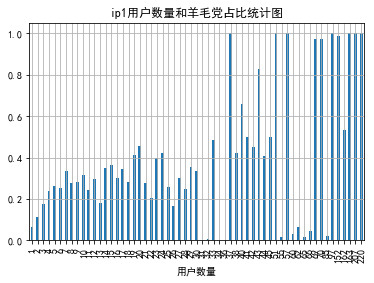

                  用户数量   羊毛党用户占比
99533c7d37963762   220  1.000000
0fe293bea342665a   207  1.000000
329ad082dc996703   207  1.000000
8f10d8efe9372319   163  1.000000
38b3fc87783670bc   162  0.067901
8cc731ce206a9c63   162  1.000000
211d0e54f3da2e8d   152  0.986842
31e45421f33b64e4    97  1.000000
202bc6b6f19285a3    85  0.023529
2a01213080dd0d05    70  0.971429
7bff3375c48ba10a    69  0.971014
717f0aa5f82f10b8    66  0.045455
e2c6e8c446eec4da    65  0.015385
bdb0426bcd4cb5ce    62  0.064516
666829313283dbc2    60  0.033333
650905308c785d97    57  1.000000
5a3569ee1edd8109    55  0.018182
b3a7141ca38c0ffe    51  1.000000
47a4bfc676efbad7    45  1.000000
33cebee5849d5b87    45  0.000000
facd7e6fb5a19d08    44  0.818182
110541d40ff16be3    44  0.000000
c6df9cc68123db8c    43  0.813953
46dbe87c0ac24bfc    43  0.837209
001ac0b23e1e8c73    42  0.452381
d0491aabe19019c1    41  1.000000
da7d741209327147    41  0.000000
f7257422014b1130    40  1.000000
da142fe9e203507e    40  0.825000
2a39f6c577

In [28]:
one_one("ip1")

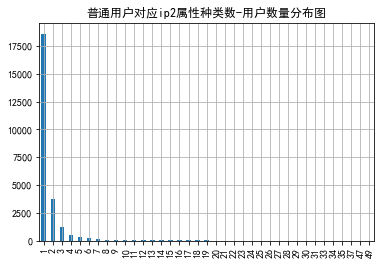

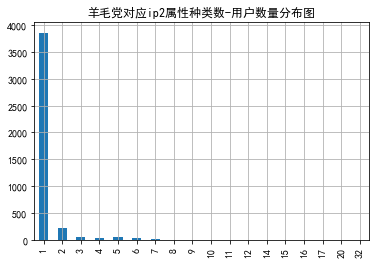

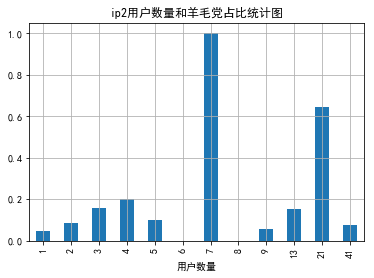

                  用户数量   羊毛党用户占比
38b3fc87783670bc    41  0.073171
1cff430529049618    21  0.285714
5777335f8759f4f4    21  1.000000
5ca580562496078a    13  0.307692
ac9440b7bb2471f1    13  0.000000
717f0aa5f82f10b8     9  0.111111
b462bd2eeb081873     9  0.000000
666829313283dbc2     8  0.000000
1031aa43bfccc7ce     8  0.000000
a8231e4071d85861     7  1.000000
4cd4a3df70a9960b     6  0.000000
388001588b518f19     6  0.000000
ad2e762954cdfde3     6  0.000000
911c3151b2565d59     6  0.000000
6095b290cc67bc3e     5  0.000000
5ea2d664eed0540c     5  0.000000
9270fe318ef8a3c7     5  0.000000
18d2378efc1481d1     5  0.000000
8adef2c8790431e1     5  0.000000
a496c885ff4c1335     5  0.000000
ac99f4156befdd71     5  0.000000
537d307a4018c641     5  0.400000
8629635e26dd08d2     5  0.000000
9acbf7ed77c21583     5  1.000000
9dfc24fec3ac7896     5  0.000000
9c9d49eddb6a59c3     5  0.000000
bdb0426bcd4cb5ce     5  0.000000
dfabfc22846b1542     5  0.000000
47f70286272f2f0d     4  0.000000
cad8ee6599

In [29]:
one_one("ip2")

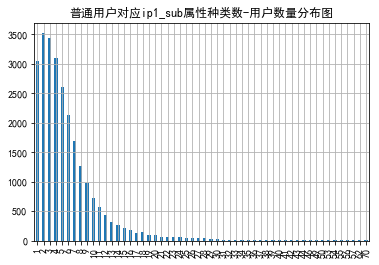

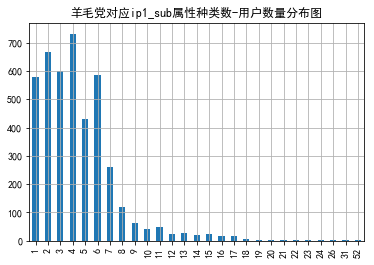

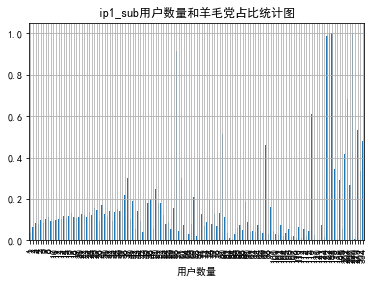

                  用户数量   羊毛党用户占比
7661c9041bbe683c   334  0.482036
ee2a277f07c7ac81   302  0.334437
94e0916180e8fcea   273  0.534799
5e251ecd7ab23a78   270  0.007407
72309d88abb9b916   220  1.000000
d8883ffc88c699b4   209  0.267943
8393a8ab6d3d7a17   207  0.053140
f5009e2c6c13c80c   207  1.000000
d212bf8069071714   207  1.000000
5f0ef1c6d3d583a2   202  0.415842
afec34bd646ec2a4   195  0.056410
c4120bd359792634   186  0.290323
0c3a034c1b640742   178  0.005618
d99c9998872374a4   175  0.342857
933cd147f9d087e5   163  1.000000
b8854c4e851ae095   162  1.000000
d7833f8214e8019f   152  0.986842
77aa94e2b65e0d4e   134  0.014925
42ef08ad5fe9ed51   123  0.073171
3cd33fe6582625ef   121  0.000000
c1363e30b5fb8033   120  0.000000
a9af48397a9241fe   117  0.025641
db6b37dff2c7047e   116  0.612069
e346d2d7203f860d   115  0.043478
1bdc61a76028316a   114  0.017544
0cf49ee4c102f268   114  0.026316
5e55e751fee7e842   113  0.026549
4e2f2b7196502636   113  0.132743
a3ac2177e065a819   113  0.035398
250e623868

In [30]:
one_one("ip1_sub")

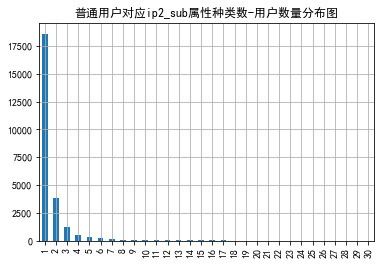

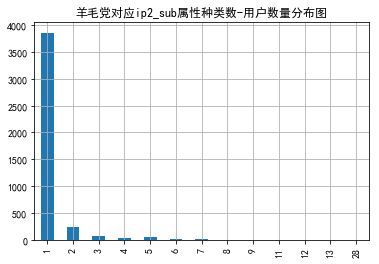

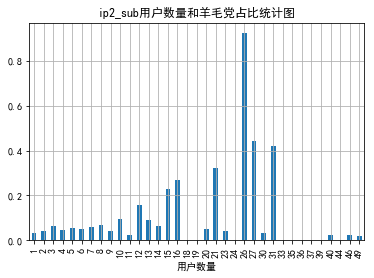

                  用户数量   羊毛党用户占比
ecd70f35df9c9770    49  0.020408
178bab340bda6aee    46  0.000000
afec34bd646ec2a4    46  0.065217
6027a7f30d161a29    46  0.000000
a9af48397a9241fe    44  0.000000
3e0ce9d755238f01    40  0.025000
77aa94e2b65e0d4e    39  0.000000
28d8941b7097a125    37  0.000000
b57a6644619c15c6    36  0.000000
f22d16b3b1701917    35  0.000000
5e251ecd7ab23a78    33  0.000000
0c3a034c1b640742    33  0.000000
7661c9041bbe683c    31  0.419355
8393a8ab6d3d7a17    30  0.033333
ee2a277f07c7ac81    27  0.444444
0a52fd4ad5c3aa32    26  0.923077
f88a9d194da2da1b    24  0.000000
e41fe24bf49b96e4    23  0.043478
bda432d389f5f3cf    21  0.285714
b0ef81902708b67b    21  0.000000
2b14a2d1bdfffb8d    21  1.000000
e290e06e44830a09    21  0.000000
9eb5c403d9fe5af0    20  0.000000
15b8eb12588a9fe4    20  0.050000
d8883ffc88c699b4    20  0.150000
992aa9c8430e3301    20  0.000000
fd5d157480456b41    19  0.000000
ae6365e1405d2464    19  0.000000
1c52fae4962f91aa    18  0.000000
40c7687bfa

In [32]:
one_one("ip2_sub")